# BioImage Model Zoo Example notebook

This notebook shows how to interact with the `bioimgaeio.spec` programmatically to explore, load and export content from the [BioImage Model Zoo](https://bioimage.io).
The bioimageio.spec library is documented [here](https://bioimage-io.github.io/spec-bioimage-io/bioimageio/spec.html).

## 0. Setup

### 0.1 Install dependencies
(if in Google Colab)

In [1]:
import os

if os.getenv("COLAB_RELEASE_TAG"):
    %pip install bioimageio.spec bioimageio.core[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.0/203.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 13.8 MB/s eta 0:00:00


### 0.2 Enable pretty validation errors

Improves readiblity of format validation errors in Jupyter notebooks by removing redundant error details and hiding calls witin the pydantic library from the stacktrace.

In [2]:
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

enable_pretty_validation_errors_in_ipynb()

## 1. Inspect the available models in the BioImage Model Zoo

Go to https://bioimage.io to browser available models

## 2. Load and inspect a model description

bioimage.io resources may be identified via their bioimage.io ID, e.g. "affable-shark" or the [DOI](https://doi.org/) of their [Zenodo](https://zenodo.org/) backup.

Both of these options may be version specific ("affable-shark/1" or a version specific [Zenodo](https://zenodo.org/) backup [DOI](https://doi.org/)).

Alternativly any RDF source may be loaded by providing a local path or URL.

In [4]:
# Load the model description with one of the following options
# from source
MODEL_URL = "https://zenodo.org/records/11092562/files/rdf.yaml"
MODEL_PATH = "some/local/rdf.yaml"
MODEL_PACKAGE_PATH = "some/local/package.zip"  # with an rdf.yaml inside

# uploaded draft (a non-published upload that will be removed once published)
MODEL_DRAFT = "affable-shark/draft"

# version specific ID/DOI
MODEL_VERSION_ID = "affable-shark/1.1"  # recommended to preserve backward compatibility
MODEL_VERSION_DOI = "10.5281/zenodo.11092562"  # version DOI of backup on zenodo.org

# version unspecific (implicitly refering to the latest version):
MODEL_ID = "affable-shark"
MODEL_DOI = "10.5281/zenodo.11092561"  # concept DOI of backup on zenodo.org

In [5]:
# Another set of examples to source a bioimage.io model
# Load the model description with one of the following options
# from source
MODEL_URL = "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1/files/rdf.yaml"

# uploaded draft (a non-published upload that will be removed once published)
MODEL_DRAFT = "emotional-cricket/draft"

# version specific ID/DOI
MODEL_VERSION_ID = (
    "emotional-cricket/1.1"  # recommended to preserve backward compatibility
)
MODEL_VERSION_DOI = "10.5281/zenodo.7768142"  # version DOI of backup on zenodo.org

# version unspecific (implicitly refering to the latest version):
MODEL_ID = "emotional-cricket"
MODEL_DOI = "10.5281/zenodo.6346511"  # concept DOI of backup on zenodo.org

In [6]:
from bioimageio.spec import InvalidDescr, load_description
from bioimageio.spec.model.v0_5 import ModelDescr

source = MODEL_VERSION_ID  # we recommend to use a versions specific ID for published descriptions

loaded_description = load_description(source)

2025-03-26 09:17:41.001 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:131 - loading emotional-cricket/1.1 from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/rdf.yaml
100%|█████████████████████████████████████| 3.96k/3.96k [00:00<00:00, 2.42MB/s]
100%|██████████████████████████████████████████| 173/173 [00:00<00:00, 112kB/s]
SHA256 hash of downloaded file: dbc7ce98011f1d32681900ef7c10de6799835bfccda3baf75715f31d5f5e6efe
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|█████████████████████████████████████| 6.55M/6.55M [00:00<00:00, 4.24GB/s]
computing SHA256 of 92949154ae8dc20c912526b5725dd66c-test_input.npy (result: f1f8ca796543958272fa0886bf95fd2b60be86fcb382bddba5795d226c10b2e7): 100%|██████████| 6553728/6553728 [00:00<00:00, 172276885.45it/s]
100%|█████████████████████████████████████| 6.57M/6.57M [00:00<00:00, 4.81GB/s]

## 3. Validation summary of the model
A model description is validated with our format specification.
To inspect the corresponding validation summary access the `validation_summary` attribute.

The validation summary will indicate:
- the version of the `bioimageio.spec` library used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

To display the validaiton summary in a terminal or notebook we recommend to run:

In [7]:
loaded_description.validation_summary.display()


|        ✔️       |                               bioimageio format validation passed                                |
|       ---       |                                               ---                                                |
| source          | https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/rdf.yaml |
| format version  | model 0.5.3                                                                                      |
| bioimageio.spec | 0.5.3.5                                                                                          |

|  ❓  |                   location                   |                                                                                                                                                          detail                                                                                                                                                          |
| --- |                     ---                      |                                                                                                                                                           ---                                                                                                                                                            |
| ✔️  | `.`                                          | initialized ModelDescr to describe model 0.5.3                                                                                                                                                                                                                                                                           |
| ✔️  | `.`                                          | bioimageio.spec format validation model 0.5.3                                                                                                                                                                                                                                                                            |
| 🔍   | context.perform_io_checks                    | True                                                                                                                                                                                                                                                                                                                     |
| 🔍   | context.root                                 | https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files                                                                                                                                                                                                                                  |
| 🔍   | context.known_files.test_input.npy           | f1f8ca796543958272fa0886bf95fd2b60be86fcb382bddba5795d226c10b2e7                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.sample_input_0.tif       | 05fbcc83d103c5d6368556e288afad6b11360cb21aeddef72d14330e46f41744                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.test_output.npy          | 9deff125e441645c0ce0c1839523becb1b3d35576c47d6a8074a4fe1daa96e42                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.sample_output_0.tif      | 3e9470b1ffc9cc9629ad7d7adde79484c194a3df662259a9146cf2cee8d57414                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.unet.py                  | 2da9f7149e144b63fee715fb8fe5154e96bf9aa230d176c91e923d528ef0c4e1                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.confocal_pnas_3d.pytorch | 636ceb89e6f798fe27b1c4c5ef237dee6815443b0d23915b850624270d91fa76                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.torchscript_tracing.pt   | f1c0976293f5e50e68a283289ed4560adea53a2d59ea06070bbfd12769cfb7ad                                                                                                                                                                                                                                                         |
| 🔍   | context.warning_level                        | error                                                                                                                                                                                                                                                                                                                    |
| ⚠   | `documentation`                              | No '# Validation' (sub)section found in unet3d.md.                                                                                                                                                                                                                                                                       |
| ⚠   | `weights`                                    | Exactly one weights entry may not specify the `parent` field (got 2). That entry is considered the original set of model weights. Other weight formats are created through conversion of the orignal or already converted weights. They have to reference the weights format they were converted from as their `parent`. |


In [8]:
# let's make sure we have a valid model...
if isinstance(loaded_description, InvalidDescr):
    raise ValueError(f"Failed to load {source}")
elif not isinstance(loaded_description, ModelDescr):
    raise ValueError("This notebook expects a model 0.5 description")

model = loaded_description
example_model_id = model.id
assert example_model_id is not None

## 4. Inspect the model description

In [9]:
from typing import Any

import imageio.v3
import matplotlib.pyplot as plt
from numpy.typing import NDArray

from bioimageio.spec._internal.io import FileSource
from bioimageio.spec.utils import download


def imread(src: FileSource) -> NDArray[Any]:
    """typed `imageio.v3.imread`"""
    img: NDArray[Any] = imageio.v3.imread(download(src).path)
    return img


print(f"The model is named '{model.name}'")
print(f"Description:\n{model.description}")
print(f"License: {model.license}")

The model is named '3D UNet Arabidopsis Apical Stem Cells'
Description:
3D Unet trained on confocal images of Arabidopsis thaliana apical stem cell: https://www.repository.cam.ac.uk/handle/1810/262530. Voxel size: [0.25, 0.25, 0.25]
License: MIT


In [10]:
try:
    from devtools import pprint
except ImportError:
    from pprint import pprint

print("\nThe authors of the model are:")
pprint(model.authors)
print("\nIn addition to the authors it is maintained by:")
pprint(model.maintainers)


The authors of the model are:
[Author(affiliation=None, email=None, orcid=None, name='Lorenzo Cerrone', github_user='lorenzocerrone'),
 Author(affiliation=None, email=None, orcid=None, name='Adrian Wolny', github_user='wolny')]

In addition to the authors it is maintained by:
[Maintainer(affiliation=None, email=None, orcid=None, name=None, github_user='wolny')]


In [11]:
print("\nIf you use this model, you are expected to cite:")
pprint(model.cite)

print(f"\nFurther documentation can be found here: {model.documentation}")


If you use this model, you are expected to cite:
[CiteEntry(text='Wolny, Cerrone et al. Accurate and Versatile 3D Segmentation of Plant Tissues at Cellular Resolution. eLife 2020.', doi=None, url='https://elifesciences.org/articles/57613')]

Further documentation can be found here: unet3d.md



There is an associated GitHub repository: https://github.com/kreshuklab/plant-seg.


100%|████████████████████████████████████████| 151k/151k [00:00<00:00, 141MB/s]
SHA256 hash of downloaded file: 5cf629bf7504e753cfaf16b1bc19ff7ac24e65fa2a8f11d4654920b364e4b350
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


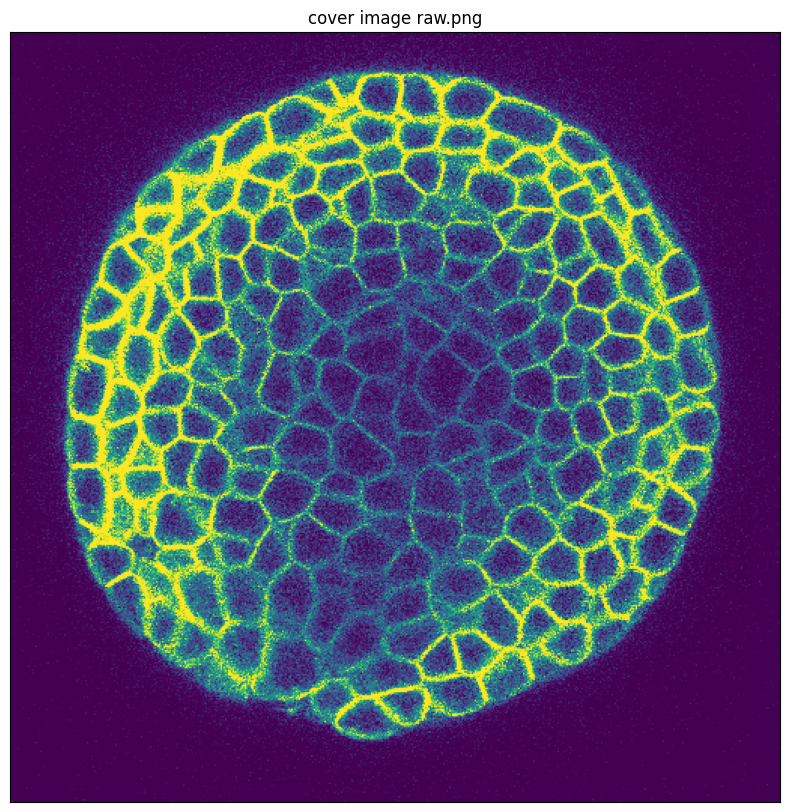

100%|█████████████████████████████████████| 67.9k/67.9k [00:00<00:00, 7.51MB/s]
SHA256 hash of downloaded file: 3b48c386799354dde4bbb4b189a4feaae0d5b37397a09b8b307077255decb989
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


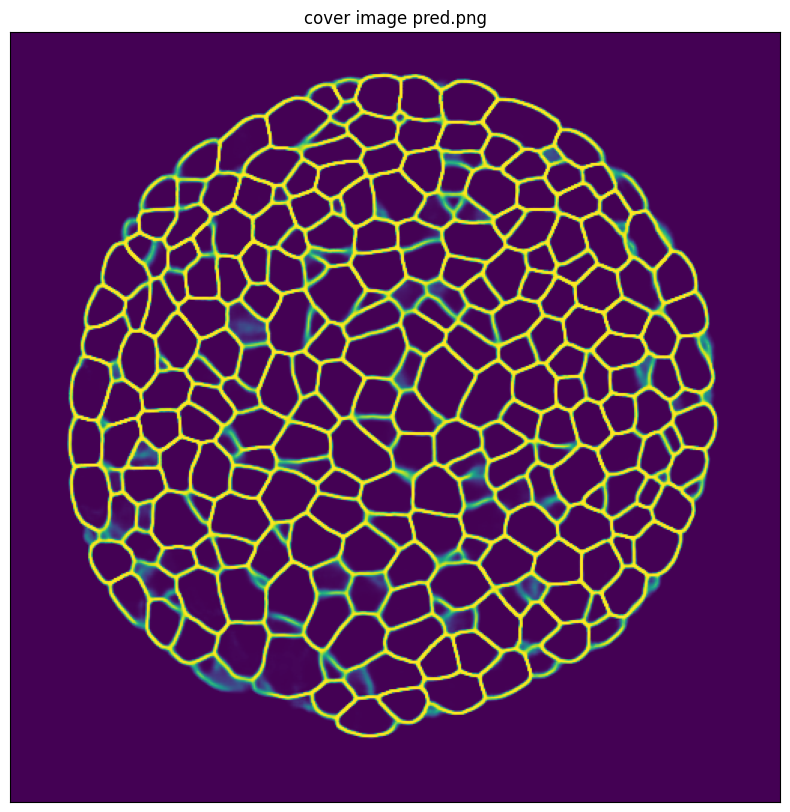

In [12]:
if model.git_repo is None:
    print("\nThere is no associated GitHub repository.")
else:
    print(f"\nThere is an associated GitHub repository: {model.git_repo}.")

for i, cover in enumerate(model.covers):
    downloaded_cover = download(cover)
    cover_data: NDArray[Any] = imread(downloaded_cover.path)
    _ = plt.figure(figsize=(10, 10))
    plt.imshow(cover_data)  # type: ignore
    plt.xticks([])  # type: ignore
    plt.yticks([])  # type: ignore
    plt.title(f"cover image {downloaded_cover.original_file_name}")  # type: ignore
    plt.show()

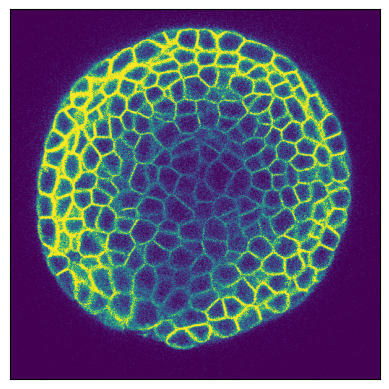

In [13]:
from bioimageio.spec.utils import download

cover_path = download(model.covers[0]).path
plt.imshow(imread(cover_path))
plt.xticks([])
plt.yticks([])
plt.show()

### 4.1 Inspect Available weight formats of the model

In [14]:
for w in [
    (weights := model.weights).onnx,
    weights.keras_hdf5,
    weights.tensorflow_js,
    weights.tensorflow_saved_model_bundle,
    weights.torchscript,
    weights.pytorch_state_dict,
]:
    if w is None:
        continue

    print(w.weights_format_name)
    print(f"weights are available at {w.source.absolute()}")
    print(f"and have a SHA-256 value of {w.sha256}")
    details = {
        k: v
        for k, v in w.model_dump(mode="json", exclude_none=True).items()
        if k not in ("source", "sha256")
    }
    if details:
        print(f"additonal metadata for {w.weights_format_name}:")
        pprint(details)

    print()

TorchScript
weights are available at https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/torchscript_tracing.pt
and have a SHA-256 value of f1c0976293f5e50e68a283289ed4560adea53a2d59ea06070bbfd12769cfb7ad
additonal metadata for TorchScript:
{'pytorch_version': '1.13.0'}

Pytorch State Dict
weights are available at https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/confocal_pnas_3d.pytorch
and have a SHA-256 value of 636ceb89e6f798fe27b1c4c5ef237dee6815443b0d23915b850624270d91fa76
additonal metadata for Pytorch State Dict:
{'architecture': {'callable': 'UNet3D',
                  'kwargs': {'f_maps': 32,
                             'final_sigmoid': True,
                             'in_channels': 1,
                             'is_segmentation': True,
                             'layer_order': 'gcr',
                             'num_groups': 8,
                             'out_channels': 1,
                  

### 4.2 Inspect expected inputs and outputs of the model

In [16]:
print(
    f"Model '{model.name}' requires {len(model.inputs)} input(s) with the following features:"
)
for ipt in model.inputs:
    print(f"\ninput '{ipt.id}' with axes:")
    pprint(ipt.axes)
    print(f"Data description: {ipt.data}")
    print(f"Test tensor available at:  {ipt.test_tensor.source.absolute()}")
    if len(ipt.preprocessing) > 1:
        print("This input is preprocessed with: ")
        for p in ipt.preprocessing:
            print(p)

print(
    "\n-------------------------------------------------------------------------------"
)
# # and what the model outputs are
print(
    f"Model '{model.name}' requires {len(model.outputs)} output(s) with the following features:"
)
for out in model.outputs:
    print(f"\noutput '{out.id}' with axes:")
    pprint(out.axes)
    print(f"Data description: {out.data}")
    print(f"Test tensor available at:  {out.test_tensor.source.absolute()}")
    if len(out.postprocessing) > 1:
        print("This output is postprocessed with: ")
        for p in out.postprocessing:
            print(p)

Model '3D UNet Arabidopsis Apical Stem Cells' requires 1 input(s) with the following features:

input 'raw' with axes:
[BatchAxis(id='batch', description='', type='batch', size=None),
 ChannelAxis(id='channel', description='', type='channel', channel_names=['channel0']),
 SpaceInputAxis(size=100, id='z', description='', type='space', unit=None, scale=1.0, concatenable=False),
 SpaceInputAxis(size=128, id='y', description='', type='space', unit=None, scale=1.0, concatenable=False),
 SpaceInputAxis(size=128, id='x', description='', type='space', unit=None, scale=1.0, concatenable=False)]
Data description: type='float32' range=(None, None) unit='arbitrary unit' scale=1.0 offset=None
Test tensor available at:  https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/test_input.npy

-------------------------------------------------------------------------------
Model '3D UNet Arabidopsis Apical Stem Cells' requires 1 output(s) with the following features:

out

### 4.3 Inspect model architecture

(inspection in this notebook only implemented for pytorch state dict weights)

In [17]:
from typing_extensions import assert_never

from bioimageio.spec.model.v0_5 import (
    ArchitectureFromFileDescr,
    ArchitectureFromLibraryDescr,
)

assert isinstance(model, ModelDescr)
if (w := model.weights.pytorch_state_dict) is not None:
    arch = w.architecture
    print(f"callable: {arch.callable}")
    if isinstance(arch, ArchitectureFromFileDescr):
        print(f"import from file: {arch.source.absolute()}")
        if arch.sha256 is not None:
            print(f"SHA-256: {arch.sha256}")
    elif isinstance(arch, ArchitectureFromLibraryDescr):
        print(f"import from module: {arch.import_from}")
    else:
        assert_never(arch)

callable: UNet3D
import from file: https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/unet.py
SHA-256: 2da9f7149e144b63fee715fb8fe5154e96bf9aa230d176c91e923d528ef0c4e1


### 4.4 Inspect it all!

Of course we can also inspect the model description in full detail...
(which is a lot of text and the reason we have a `ModelDescr` object in the first place that keeps this metadata more organized)

In [18]:
pprint(model)

ModelDescr(name='3D UNet Arabidopsis Apical Stem Cells', description='3D Unet trained on confocal images of Arabidopsis thaliana apical stem cell: https://www.repository.cam.ac.uk/handle/1810/262530. Voxel size: [0.25, 0.25, 0.25]', covers=[RelativePath('raw.png'), RelativePath('pred.png')], id_emoji='🦗', authors=[Author(affiliation=None, email=None, orcid=None, name='Lorenzo Cerrone', github_user='lorenzocerrone'), Author(affiliation=None, email=None, orcid=None, name='Adrian Wolny', github_user='wolny')], attachments=[], cite=[CiteEntry(text='Wolny, Cerrone et al. Accurate and Versatile 3D Segmentation of Plant Tissues at Cellular Resolution. eLife 2020.', doi=None, url='https://elifesciences.org/articles/57613')], license='MIT', config={'bioimageio': {'nickname': 'emotional-cricket', 'nickname_icon': '🦗', 'thumbnails': {'pred.png': 'pred.thumbnail.png', 'raw.png': 'raw.thumbnail.png'}}, 'deepimagej': {'allow_tiling': True, 'model_keys': None, 'prediction': {'postprocess': [{'spec': 

## 5. Create a model description

Let's recreate a model based on parts of the loaded model description from above!

Creating a model description with bioimageio.spec means creating a `bioimageio.spec.model.ModelDescr` object. This description object can be exportet and uploaded to the BioImage Model Zoo or deployed directly with community partner software.


Without any input data, initializing a `ModelDescr` will raise a `ValidationError` listing missing required fields:

In [19]:
from bioimageio.spec.model.v0_5 import ModelDescr

_ = ModelDescr()  # pyright: ignore[reportCallIssue]

ValidationError: 9 validation errors for bioimage.io model specification:
name
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
description
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
authors
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
cite
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
license
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
documentation
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
inputs
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
outputs
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]
weights
  Field required [input={'format_version': '0.5.3', 'type': 'model'}]

To populate a `ModelDescr` appropriately we need to create the required subparts. This is part of the model metadata needed to document the model and ensure its correct deployment.

### 5.1 Inputs:

In [20]:
from bioimageio.spec.model.v0_5 import (
    AxisId,
    BatchAxis,
    ChannelAxis,
    FileDescr,
    Identifier,
    InputTensorDescr,
    IntervalOrRatioDataDescr,
    ParameterizedSize,
    SpaceInputAxis,
    SpaceOutputAxis,
    TensorId,
    WeightsDescr,
)

input_axes = [BatchAxis(), ChannelAxis(channel_names=[Identifier("raw")])]
if len(model.inputs[0].axes) == 5:  # e.g. impartial-shrimp
    input_axes += [
        SpaceInputAxis(id=AxisId("z"), size=ParameterizedSize(min=16, step=8)),
        SpaceInputAxis(id=AxisId("y"), size=ParameterizedSize(min=144, step=72)),
        SpaceInputAxis(id=AxisId("x"), size=ParameterizedSize(min=144, step=72)),
    ]
    data_descr = IntervalOrRatioDataDescr(type="float32")
elif len(model.inputs[0].axes) == 4:  # e.g. pioneering-rhino
    input_axes += [
        SpaceInputAxis(id=AxisId("y"), size=ParameterizedSize(min=256, step=8)),
        SpaceInputAxis(id=AxisId("x"), size=ParameterizedSize(min=256, step=8)),
    ]
    data_descr = IntervalOrRatioDataDescr(type="float32")
else:
    raise NotImplementedError(
        f"Recreating inputs for {example_model_id} is not implemented"
    )

test_input_path = model.inputs[0].test_tensor.download().path
input_descr = InputTensorDescr(
    id=TensorId("raw"),
    axes=input_axes,
    test_tensor=FileDescr(source=test_input_path),
    data=data_descr,
)

### 5.2 Outputs

In [21]:
from bioimageio.spec.model.v0_5 import OutputTensorDescr, SizeReference

assert isinstance(model.outputs[0].axes[1], ChannelAxis)
output_axes = [
    BatchAxis(),
    ChannelAxis(
        channel_names=[Identifier(n) for n in model.outputs[0].axes[1].channel_names]
    ),
]
if len(model.outputs[0].axes) == 5:  # e.g. impartial-shrimp
    output_axes += [
        SpaceOutputAxis(
            id=AxisId("z"),
            size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("z")),
        ),  # same size as input (tensor `raw`) axis `z`
        SpaceOutputAxis(
            id=AxisId("y"),
            size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("y")),
        ),
        SpaceOutputAxis(
            id=AxisId("x"),
            size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("x")),
        ),
    ]
elif len(model.outputs[0].axes) == 4:  # e.g. pioneering-rhino
    output_axes += [
        SpaceOutputAxis(
            id=AxisId("y"),
            size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("y")),
        ),  # same size as input (tensor `raw`) axis `y`
        SpaceOutputAxis(
            id=AxisId("x"),
            size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("x")),
        ),
    ]
else:
    raise NotImplementedError(
        f"Recreating outputs for {example_model_id} is not implemented"
    )

test_output_path = model.outputs[0].test_tensor.download().path
output_descr = OutputTensorDescr(
    id=TensorId("prob"),
    axes=output_axes,
    test_tensor=FileDescr(source=test_output_path),
)

### 5.3 Model architecture
PyTorch state dict type of weights need to come with the corresponding architecture (e.g., 2D-U-Net):

In [22]:
from bioimageio.spec.model.v0_5 import (
    ArchitectureFromFileDescr,
    ArchitectureFromLibraryDescr,
    Version,
)

try:
    import torch
except ImportError:
    pytorch_version = Version("1.15")
else:
    pytorch_version = Version(torch.__version__)

## Recover the architecture information from the original model
assert model.weights.pytorch_state_dict is not None

arch = model.weights.pytorch_state_dict.architecture
if isinstance(arch, ArchitectureFromFileDescr):
    arch_file_path = download(arch.source, sha256=arch.sha256).path
    arch_file_sha256 = arch.sha256
    arch_name = arch.callable
    arch_kwargs = arch.kwargs

    pytorch_architecture = ArchitectureFromFileDescr(
        source=arch_file_path,
        sha256=arch_file_sha256,
        callable=arch_name,
        kwargs=arch_kwargs,
    )
else:
    # For a model architecture that is published in a Python package
    # Make sure to include the Python library referenced in `import_from` in the weights entry's `depdendencies`
    pytorch_architecture = ArchitectureFromLibraryDescr(
        callable=arch.callable,
        kwargs=arch.kwargs,
        import_from=arch.import_from,
    )

### 5.4 Create the model

In [23]:
from bioimageio.spec.model.v0_5 import (
    Author,
    CiteEntry,
    Doi,
    HttpUrl,
    LicenseId,
    PytorchStateDictWeightsDescr,
    TorchscriptWeightsDescr,
)

assert model.weights.pytorch_state_dict is not None
assert model.weights.torchscript is not None
my_model_descr = ModelDescr(
    name="My cool model",
    description="A test model for demonstration purposes only",
    authors=[
        Author(name="me", affiliation="my institute", github_user="bioimageiobot")
    ],  # change github_user to your GitHub account name
    cite=[
        CiteEntry(text="for model training see my paper", doi=Doi("10.1234something"))
    ],
    license=LicenseId("MIT"),
    documentation=HttpUrl(
        "https://raw.githubusercontent.com/bioimage-io/spec-bioimage-io/main/README.md"
    ),
    git_repo=HttpUrl(
        "https://github.com/bioimage-io/spec-bioimage-io"
    ),  # change to repo where your model is developed
    inputs=model.inputs,
    # inputs=[input_descr],  # try out our recreated input description
    outputs=model.outputs,
    # outputs=[output_descr],  # try out our recreated input description
    weights=WeightsDescr(
        pytorch_state_dict=PytorchStateDictWeightsDescr(
            source=model.weights.pytorch_state_dict.source,
            sha256=model.weights.pytorch_state_dict.sha256,
            architecture=pytorch_architecture,
            pytorch_version=pytorch_version,
        ),
        torchscript=TorchscriptWeightsDescr(
            source=model.weights.torchscript.source,
            sha256=model.weights.torchscript.sha256,
            pytorch_version=pytorch_version,
            parent="pytorch_state_dict",  # these weights were converted from the pytorch_state_dict weights ones.
        ),
    ),
)
print(f"created '{my_model_descr.name}'")

100%|█████████████████████████████████████| 2.65k/2.65k [00:00<00:00, 2.35MB/s]
SHA256 hash of downloaded file: 7f2f7907afcf594017acca1750e27d78be3564dac1f77de99cdce53bd7bf267f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
2025-03-26 09:20:00.187 | Level 30 | bioimageio.spec.model.v0_5:_validate_documentation:2106 - documentation: No '# Validation' (sub)section found in https://raw.githubusercontent.com/bioimage-io/spec-bioimage-io/main/README.md.


created 'My cool model'


### 5.5. Covers
Some optional fields were filed with default values, e.g., we did not specify `covers`.
When possible, a default visualization of the test inputs and test outputs is generated.
When the input or the output have more than one channel, the current implementation cannot generate a cover image automatically.

Automatically generated cover images:

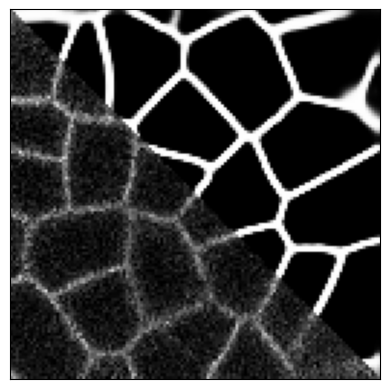

In [24]:
for cover in my_model_descr.covers:
    img: NDArray[Any] = imread(download(cover).path)
    _ = plt.imshow(img)
    plt.xticks([])  # type: ignore
    plt.yticks([])  # type: ignore
    plt.show()

## 6. Test the recently exported model
### 6.1 Static validation
(Same validation as at the very beginning)

In [25]:
model.validation_summary.display()


|        ✔️       |                               bioimageio format validation passed                                |
|       ---       |                                               ---                                                |
| source          | https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files/rdf.yaml |
| format version  | model 0.5.3                                                                                      |
| bioimageio.spec | 0.5.3.5                                                                                          |

|  ❓  |                   location                   |                                                                                                                                                          detail                                                                                                                                                          |
| --- |                     ---                      |                                                                                                                                                           ---                                                                                                                                                            |
| ✔️  | `.`                                          | initialized ModelDescr to describe model 0.5.3                                                                                                                                                                                                                                                                           |
| ✔️  | `.`                                          | bioimageio.spec format validation model 0.5.3                                                                                                                                                                                                                                                                            |
| 🔍   | context.perform_io_checks                    | True                                                                                                                                                                                                                                                                                                                     |
| 🔍   | context.root                                 | https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/emotional-cricket/1.1/files                                                                                                                                                                                                                                  |
| 🔍   | context.known_files.test_input.npy           | f1f8ca796543958272fa0886bf95fd2b60be86fcb382bddba5795d226c10b2e7                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.sample_input_0.tif       | 05fbcc83d103c5d6368556e288afad6b11360cb21aeddef72d14330e46f41744                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.test_output.npy          | 9deff125e441645c0ce0c1839523becb1b3d35576c47d6a8074a4fe1daa96e42                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.sample_output_0.tif      | 3e9470b1ffc9cc9629ad7d7adde79484c194a3df662259a9146cf2cee8d57414                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.unet.py                  | 2da9f7149e144b63fee715fb8fe5154e96bf9aa230d176c91e923d528ef0c4e1                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.confocal_pnas_3d.pytorch | 636ceb89e6f798fe27b1c4c5ef237dee6815443b0d23915b850624270d91fa76                                                                                                                                                                                                                                                         |
| 🔍   | context.known_files.torchscript_tracing.pt   | f1c0976293f5e50e68a283289ed4560adea53a2d59ea06070bbfd12769cfb7ad                                                                                                                                                                                                                                                         |
| 🔍   | context.warning_level                        | error                                                                                                                                                                                                                                                                                                                    |
| ⚠   | `documentation`                              | No '# Validation' (sub)section found in unet3d.md.                                                                                                                                                                                                                                                                       |
| ⚠   | `weights`                                    | Exactly one weights entry may not specify the `parent` field (got 2). That entry is considered the original set of model weights. Other weight formats are created through conversion of the orignal or already converted weights. They have to reference the weights format they were converted from as their `parent`. |


### 6.2 Dynamic validation

If you have the `bioimageio.core` library installed, you can run the dynamic validation and test if the model is correct and properly producing the test output image from the test input image.
This extends the validation summary from above:

In [26]:
from bioimageio.core import test_model

summary = test_model(my_model_descr)
summary.display()

2025-03-26 09:20:24.805 | DEBUG    | bioimageio.core._resource_tests:enable_determinism:93 - module 'tensorflow._api.v2.random' has no attribute 'seed'
2025-03-26 09:20:24.806 | INFO     | bioimageio.core._resource_tests:_test_model_inference:226 - starting 'Reproduce test outputs from test inputs (pytorch_state_dict)'
2025-03-26 09:20:41.359 | WARNING  | bioimageio.spec.get_conda_env:_get_default_pytorch_env:142 - UPDATE NEEDED: Specify pins for additional pytorch==2.6.0+cu124 dependencies!
2025-03-26 09:20:41.370 | INFO     | bioimageio.core._resource_tests:_test_model_inference_parametrized:317 - Testing inference with 2 different input tensor sizes
2025-03-26 09:21:38.613 | INFO     | bioimageio.core._resource_tests:_test_model_inference:226 - starting 'Reproduce test outputs from test inputs (torchscript)'
2025-03-26 09:21:54.648 | WARNING  | bioimageio.spec.get_conda_env:_get_default_pytorch_env:142 - UPDATE NEEDED: Specify pins for additional pytorch==2.6.0+cu124 dependencies!
2


|        ✔️       | bioimageio format validation passed |
|       ---       |                 ---                 |
| source          | in-memory                           |
| format version  | model 0.5.3                         |
| bioimageio.spec | 0.5.3.5                             |
| bioimageio.core | 0.7.0                               |

|  ❓  |           location           |                                                                                                                                           detail                                                                                                                                          |
| --- |             ---              |                                                                                                                                            ---                                                                                                                                            |
| ✔️  | `.`                          | initialized ModelDescr to describe model 0.5.3                                                                                                                                                                                                                                            |
| ✔️  | `type`                       | Has expected resource type                                                                                                                                                                                                                                                                |
| ✔️  | `weights.pytorch_state_dict` | Reproduce test outputs from test inputs (pytorch_state_dict)                                                                                                                                                                                                                              |
| 🐍   | `weights.pytorch_state_dict` | recommended conda env (Reproduce test outputs from test inputs (pytorch_state_dict))<br><pre><code>channels: [pytorch, conda-forge, nodefaults]</code><br><code>dependencies: [cpuonly, 'numpy >=2,<3', pip, pytorch==2.6.0+cu124, torchaudio, torchvision]</code><br><code></code></pre> |
| 🐍   | `weights.pytorch_state_dict` | conda compare ({d.name}):<br>compare: 1: conda: not found<br>                                                                                                                                                                                                                             |
| ✔️  | `weights.pytorch_state_dict` | Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 0                                                                                                                                                                                                    |
| ✔️  | `weights.pytorch_state_dict` | Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 0                                                                                                                                                                                                    |
| ✔️  | `weights.torchscript`        | Reproduce test outputs from test inputs (torchscript)                                                                                                                                                                                                                                     |
| 🐍   | `weights.torchscript`        | recommended conda env (Reproduce test outputs from test inputs (torchscript))<br><pre><code>channels: [pytorch, conda-forge, nodefaults]</code><br><code>dependencies: [cpuonly, 'numpy >=2,<3', pip, pytorch==2.6.0+cu124, torchaudio, torchvision]</code><br><code></code></pre>        |
| 🐍   | `weights.torchscript`        | conda compare ({d.name}):<br>compare: 1: conda: not found<br>                                                                                                                                                                                                                             |
| ✔️  | `weights.torchscript`        | Run torchscript inference for inputs with batch_size: 1 and size parameter n: 0                                                                                                                                                                                                           |
| ✔️  | `weights.torchscript`        | Run torchscript inference for inputs with batch_size: 2 and size parameter n: 0                                                                                                                                                                                                           |


For a more extensive example of the use of bioimageio.core, check out [model_usage.ipynb](https://github.com/bioimage-io/core-bioimage-io-python/blob/main/example/model_usage.ipynb).
The bioimageio.core library is documented [here](https://bioimage-io.github.io/core-bioimage-io-python/bioimageio/core.html).

## 7. Package your model

A model is more than it's YAML description file! We refer to a zip-file containing all files relevant to a model as a model package.

In [ ]:
from pathlib import Path

from bioimageio.spec import save_bioimageio_package

print(
    "package path:",
    save_bioimageio_package(my_model_descr, output_path=Path("my_model.zip")),
)